# Logistic Regression Technique For Rain Prediction
Rafi Afridi, August 13, 2020.[Here](http://skilllx.com/logistic-regression-technique-for-rain-prediction/). 

This tutorial is the dataset which contains daily weather observations from numerous Australian weather stations. Our system will try to answer the question that whether or not it will rain in Australia tomorrow

## Problem Statement
Based on various readings required for rain prediction, we will predict “Did it rain the next day? Yes or No“

## Proposed Technique
As this problem is binary class problem (Rain or Not), we will use logistic regression technique.

## Dataset Used
Dataset used here can be downloaded from the Kaggle. [Data-kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)

## Data Description
[Here](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)


## Problem Solving in Python

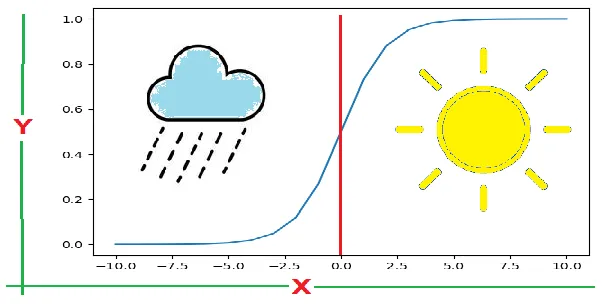

In [6]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# https://github.com/scikit-learn-contrib/category_encoders
import category_encoders as encod

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

## Data Explore

In [2]:
data = '..\\..\\data\\weatherAUS.data.csv'
df = pd.read_csv(data)
df.shape

(142193, 24)

In [3]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [8]:
print(df.columns)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Checking Data Types

In [10]:
for var in df.columns:
    print(var, "=",df[var].dtype)

Date = object
Location = object
MinTemp = float64
MaxTemp = float64
Rainfall = float64
Evaporation = float64
Sunshine = float64
WindGustDir = object
WindGustSpeed = float64
WindDir9am = object
WindDir3pm = object
WindSpeed9am = float64
WindSpeed3pm = float64
Humidity9am = float64
Humidity3pm = float64
Pressure9am = float64
Pressure3pm = float64
Cloud9am = float64
Cloud3pm = float64
Temp9am = float64
Temp3pm = float64
RainToday = object
RISK_MM = float64
RainTomorrow = object


#### Challenge 1: Missing Values

Let’s accept missing data and try to handle this situation. The very first solution is drop that record which contain any missing field. This will work but if missing records are less in number. But if there more records where some fields are missing, we should fill those. You must be thinking how we can fill those fields? It’s very easy.

- Scenario 1: (Frequent Value)
- Scenario 2: (Average or Mean)
- Scenario 3: (Sequential or Time Series Data)
- Scenario 4: (Knowledge)
- Scenario 5: (Heuristics)

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

#### Visualization

In [5]:
plt.figure(figsize=(15,10))
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

NameError: name 'plt' is not defined

In [4]:

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis=1, inplace = True)

categorical = [var for var in df.columns if df[var].dtype == 'O']

X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

encoder = encod.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

cols = X_train.columns

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

logreg = LogisticRegression(solver='liblinear', random_state=0)

logreg.fit(X_train, y_train)

y_pred_test = logreg.predict(X_test)

print(y_pred_test)

print(logreg.predict_proba(X_test)[:,0])

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

['No' 'No' 'No' ... 'No' 'No' 'Yes']
[0.93389913 0.89171786 0.86332046 ... 0.97546334 0.8454278  0.22066902]
Model accuracy: 0.9082
